<a href="https://colab.research.google.com/github/JohnYCLam/MachineLearning/blob/main/PyTorch_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collapse

In [ ]:
y = x + 2
y

NameError: name 'x' is not defined

In [ ]:
import torch

In [ ]:
x = torch.ones(2, 2, requires_grad = True)

In [ ]:
z = y * 3
out = z.mean()
out

NameError: name 'y' is not defined

In [ ]:
out.backward()

In [ ]:
print(x.grad)

In [ ]:
with torch.no_grad():
  (x**2).requires_grad

In [ ]:
import torch.nn as nn

In [ ]:
X = torch.ones((64, 3, 256, 256))

In [ ]:
conv = nn.Conv2d(in_channels = 3, out_channels = 8, kernel_size = 3, stride = 1, padding = 1)

In [ ]:
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

In [ ]:
import torch
import torchvision

train_set = torchvision.datasets.CIFAR10(
    root = './data', train = True, download = True, transform = transform
)

train_loader = torch.utils.data.DataLoader(
    train_set, batch_size = 8, shuffle = True, num_workers = 2
)

In [ ]:
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return self.fc3(x)

In [ ]:
import torch.optim as optim
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

In [ ]:
net.train()

In [ ]:
for epoch in range(10):
  for inputs, labels in train_loader:
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

# Simple Linear Regression Model

In [ ]:
import torch
import torch.nn as nn

In [ ]:
#synthetic data
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bias

In [ ]:
split = int(len(X) * 0.8)
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]
print(len(X_train), len(y_train), len(X_test), len(y_test))

In [ ]:
class SimpleLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype = torch.float, requires_grad = True))
        self.bias = nn.Parameter(torch.randn(1, dtype = torch.float, requires_grad = True))

    def forward(self, x):
        return self.weights * x + self.bias

In [ ]:
torch.manual_seed(42)

model_0 = SimpleLinearRegression()

list(model_0.parameters())

In [ ]:
model_0.state_dict()

In [ ]:
#prediction
with torch.inference_mode():
    y_pred = model_0(X_test)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_test, y_test, label = 'True Value')
ax.scatter(X_test, y_pred, label = 'Prediction')
ax.legend()
plt.show()

In [ ]:
loss_fcn = nn.MSELoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [ ]:
epochs = 100
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

    #reset model state
    model_0.train()

    #forward propagation
    y_pred = model_0.forward(X_train)

    #calculate loss
    train_loss = loss_fcn(y_pred, y_train)

    #set gradient to zero
    optimizer.zero_grad()

    #back propagation
    train_loss.backward()

    #update weights
    optimizer.step()

    #evaluate on test set
    model_0.eval()

    with torch.inference_mode():
        #test set predictions
        test_pred = model_0(X_test)

        #test loss
        test_loss = loss_fcn(test_pred, y_test.type(torch.float))

        if epoch%10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(train_loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f'Epoch: {epoch} | MSE Train Loss: {train_loss} | MSE Test Loss: {test_loss}')

In [ ]:
fig, ax = plt.subplots()
plt.plot(epoch_count, train_loss_values, label = 'Train Loss')
plt.plot(epoch_count, test_loss_values, label = 'Test Loss')
ax.legend()
plt.show()

In [ ]:
#inspect the updated weights
model_0.state_dict()

In [ ]:
#Make prediction
model_0.eval()
with torch.inference_mode():
    y_test_pred = model_0(X_test)

fig, ax = plt.subplots()
plt.plot(X_test, y_test, label = 'Test Set')
plt.plot(X_test, y_test_pred, label = 'Prediction')
ax.legend()
plt.show()

In [ ]:
#save the model params
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True, exist_ok = True)

MODEL_NAME = '01_SimpleLinearRegressionModel'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f'Saving the model to: {MODEL_SAVE_PATH}')
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)

In [ ]:
!ls -l models/01_SimpleLinearRegressionModel

In [ ]:
#load the model params
loaded_model_0 = SimpleLinearRegression()

loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH, weights_only = True))

In [ ]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_0_pred = loaded_model_0(X_test)

In [ ]:
loaded_model_0_pred == y_test_pred

# PyTorch Binary Classification

In [24]:
#Get Data
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise = 0.1, factor = 0.5, random_state = 42)

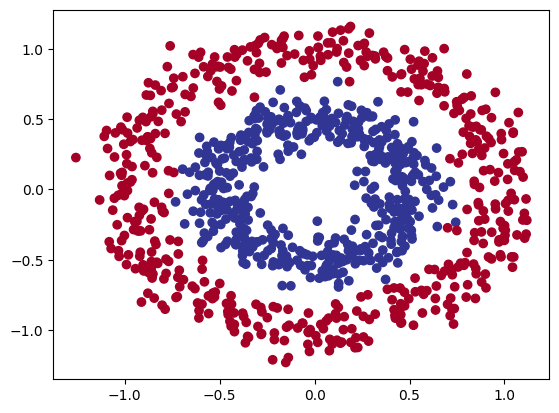

In [25]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [26]:
print(X.shape, y.shape)

(1000, 2) (1000,)


In [27]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [29]:
class CircleClassifier(nn.Module):
    def __init__(self):
       super().__init__()
       self.layer1 = nn.Linear(in_features = 2, out_features = 5)
       self.layer2 = nn.Linear(in_features = 5, out_features = 5)
       self.layer3 = nn.Linear(in_features = 5, out_features = 1)
       self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_0 = CircleClassifier().to(device)
print(model_0)

CircleClassifier(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=5, bias=True)
  (layer3): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
)


In [30]:
loss_fcn = nn.BCEWithLogitsLoss() #have built-in sigmoid layer
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

In [31]:
def accuracy(y_true, y_pred):
    count_correct = torch.eq(y_true, y_pred).sum().item()
    return count_correct / len(y_true) * 100

In [32]:
torch.manual_seed(42)
epochs = 1000

for epoch in range(epochs):
    model_0.train()
    y_train_logit = model_0(X_train).squeeze()
    y_train_pred = torch.round(torch.sigmoid(y_train_logit))

    train_loss = loss_fcn(y_train_logit, y_train)
    train_acc = accuracy(y_train, y_train_pred)

    optimizer.zero_grad()

    train_loss.backward()

    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        y_test_logit = model_0(X_test).squeeze()
        y_test_pred = torch.round(torch.sigmoid(y_test_logit))

        test_loss = loss_fcn(y_test_logit, y_test)
        test_acc = accuracy(y_test, y_test_pred)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch + 1} : train loss: {train_loss:.4f} | train acc: {train_acc:.4f} | test loss: {test_loss:.4f} | test acc: {test_acc:.4f}')



Epoch 100 : train loss: 0.6848 | train acc: 53.3750 | test loss: 0.6876 | test acc: 53.5000
Epoch 200 : train loss: 0.6706 | train acc: 57.2500 | test loss: 0.6796 | test acc: 53.0000
Epoch 300 : train loss: 0.6495 | train acc: 58.6250 | test loss: 0.6672 | test acc: 53.0000
Epoch 400 : train loss: 0.6266 | train acc: 61.2500 | test loss: 0.6511 | test acc: 53.5000
Epoch 500 : train loss: 0.6015 | train acc: 66.1250 | test loss: 0.6296 | test acc: 59.0000
Epoch 600 : train loss: 0.5676 | train acc: 72.7500 | test loss: 0.5990 | test acc: 68.0000
Epoch 700 : train loss: 0.5127 | train acc: 84.8750 | test loss: 0.5498 | test acc: 83.5000
Epoch 800 : train loss: 0.4346 | train acc: 87.6250 | test loss: 0.4815 | test acc: 87.0000
Epoch 900 : train loss: 0.3486 | train acc: 90.6250 | test loss: 0.4008 | test acc: 89.0000
Epoch 1000 : train loss: 0.2635 | train acc: 92.8750 | test loss: 0.3137 | test acc: 92.0000


In [33]:
with torch.inference_mode():
    y_test_pred = torch.round(torch.sigmoid(model_0(X_test))).squeeze()



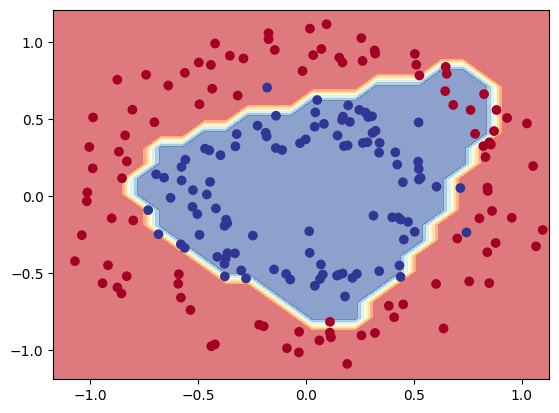

In [34]:
import numpy as np
# define bounds of the domain
min1, max1 = X_test[:, 0].min()-0.1, X_test[:, 0].max()+0.1
min2, max2 = X_test[:, 1].min()-0.1, X_test[:, 1].max()+0.1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = torch.from_numpy(np.hstack((r1,r2))).type(torch.float)
# reshape the predictions back into a grid
with torch.inference_mode():
    y_test_pred = torch.round(torch.sigmoid(model_0(grid))).squeeze()

zz = y_test_pred.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap=plt.cm.RdYlBu, alpha = 0.6)
# create scatter plot for samples from each class
plt.scatter(X_test[:, 0].squeeze(), X_test[:, 1].squeeze(), c = y_test, cmap = plt.cm.RdYlBu)


#for class_value in range(2):
#    # get row indexes for samples with this class
#    row_ix = np.where(y_test == class_value)
#    # create scatter of these samples
#    plt.scatter(X_test[row_ix, 0].squeeze(), X_test[row_ix, 1].squeeze())

# PyTorch Multi-class classification

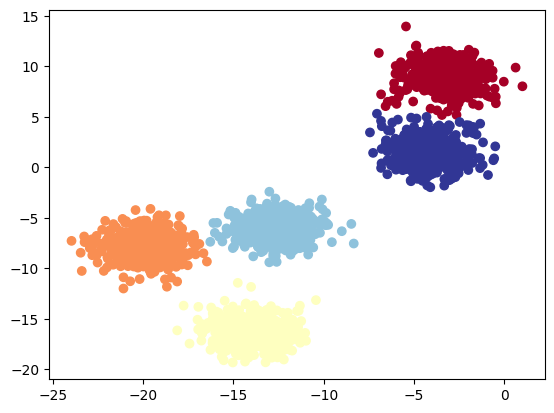

In [41]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 2000
num_features = 2
num_classes = 5
noise = 1.3
seed = 1
lower = -20
upper = 20

X, y = make_blobs(n_samples = n_samples,
    n_features = num_features, # X features
    centers = num_classes, # y labels
    cluster_std = noise, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state = seed,
    center_box = (lower, upper)

)

fig, ax = plt.subplots()
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)
plt.show()

In [42]:
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.long)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

In [65]:
class BlobClassifier(nn.Module):
    def __init__(self):
       super().__init__()
       self.layer1 = nn.Linear(in_features = 2, out_features = 5)
       self.layer2 = nn.Linear(in_features = 5, out_features = 5)
       self.layer3 = nn.Linear(in_features = 5, out_features = 5)
       self.layer4 = nn.Linear(in_features = 5, out_features = 5)
       self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer4(self.relu(self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))))

model_1 = BlobClassifier().to(device)
print(model_1)

BlobClassifier(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=5, bias=True)
  (layer3): Linear(in_features=5, out_features=5, bias=True)
  (layer4): Linear(in_features=5, out_features=5, bias=True)
  (relu): ReLU()
)


In [66]:
loss_fcn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [67]:
model_1(X_train.to(device))[:5]

tensor([[-0.3301,  0.0435, -0.0204, -0.3278,  0.1233],
        [-0.5383, -0.0829, -0.1280, -0.2058,  0.1029],
        [-0.2884,  0.0729, -0.0332, -0.3325,  0.0555],
        [-0.3682,  0.0470, -0.1297, -0.2419,  0.0256],
        [-0.2324,  0.1526, -0.1381, -0.2629, -0.0298]],
       grad_fn=<SliceBackward0>)

In [68]:
torch.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
    model_1.train()

    y_train_logit = model_1(X_train)
    y_train_pred = torch.softmax(y_train_logit, dim = 1).argmax(dim = 1)

    train_loss = loss_fcn(y_train_logit, y_train)
    train_acc = accuracy(y_train, y_train_pred)

    optimizer.zero_grad()

    train_loss.backward()

    optimizer.step()

    model_1.eval()
    with torch.inference_mode():

        y_test_logit = model_1(X_test)
        y_test_pred = torch.softmax(y_test_logit, dim = 1).argmax(dim = 1)

        test_loss = loss_fcn(y_test_logit, y_test)
        test_acc = accuracy(y_test, y_test_pred)

    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch + 1} : train loss: {train_loss:.4f} | train acc: {train_acc:.4f} | test loss: {test_loss:.4f} | test acc: {test_acc:.4f}')

Epoch 100 : train loss: 0.3920 | train acc: 78.3750 | test loss: 0.3341 | test acc: 77.5000
Epoch 200 : train loss: 0.2850 | train acc: 81.3750 | test loss: 0.2595 | test acc: 84.0000
Epoch 300 : train loss: 0.1793 | train acc: 98.8750 | test loss: 0.1710 | test acc: 96.2500
Epoch 400 : train loss: 0.1268 | train acc: 99.1250 | test loss: 0.1296 | test acc: 96.5000
Epoch 500 : train loss: 0.3139 | train acc: 82.3750 | test loss: 0.4054 | test acc: 78.0000
Epoch 600 : train loss: 0.0882 | train acc: 98.8125 | test loss: 0.0895 | test acc: 99.0000
Epoch 700 : train loss: 0.1410 | train acc: 98.3125 | test loss: 0.1405 | test acc: 97.2500
Epoch 800 : train loss: 0.1744 | train acc: 96.5625 | test loss: 0.1436 | test acc: 96.7500
Epoch 900 : train loss: 0.0920 | train acc: 97.4375 | test loss: 0.2358 | test acc: 88.0000
Epoch 1000 : train loss: 0.0612 | train acc: 98.9375 | test loss: 0.0737 | test acc: 97.7500


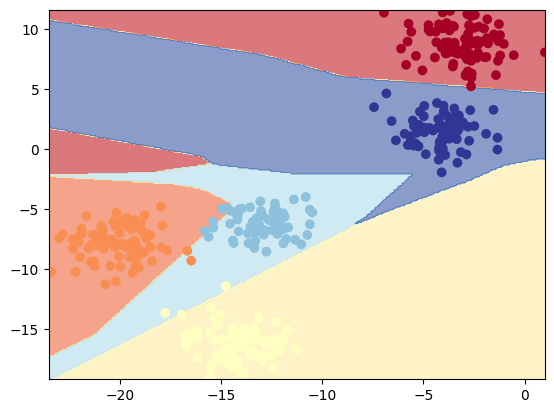

In [69]:
import numpy as np
# define bounds of the domain
min1, max1 = X_test[:, 0].min()-0.1, X_test[:, 0].max()+0.1
min2, max2 = X_test[:, 1].min()-0.1, X_test[:, 1].max()+0.1
# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = torch.from_numpy(np.hstack((r1,r2))).type(torch.float)
# reshape the predictions back into a grid
with torch.inference_mode():
    #y_test_pred = torch.round(torch.sigmoid(model_1(grid))).squeeze()
    y_test_pred = torch.softmax(model_1(grid), dim = 1).argmax(dim = 1)
zz = y_test_pred.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap=plt.cm.RdYlBu, alpha = 0.6)
# create scatter plot for samples from each class
plt.scatter(X_test[:, 0].squeeze(), X_test[:, 1].squeeze(), c = y_test, cmap = plt.cm.RdYlBu)

In [54]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.4/891.4 kB 13.7 MB/s eta 0:00:00


In [70]:
from torchmetrics import Accuracy

In [71]:
model_1.eval()
with torch.inference_mode():
    y_test_pred = torch.softmax(model_1(X_test), dim = 1).argmax(dim = 1)

torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=5).to(device)
torchmetrics_accuracy(y_test_pred, y_test)

tensor(0.9775)